In [53]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import pi


In [54]:
# Define a quantum circuit with 2 qubits: 1 address and 1 embedding
qc = QuantumCircuit(2)

# Apply Hadamard gate to the address qubit (qubit 0)
qc.h(0)

# Apply U1 (rotation around Z-axis) to the embedding qubit (qubit 1)
# Let's assume theta_1 = pi for this example
theta_1 = pi
qc.rz(theta_1, 1)

# For illustration, let's add a CNOT gate to create some entanglement
qc.cx(0, 1)

# Apply measurement to both qubits
qc.measure_all()

# Visualize the circuit
print("Quantum Circuit:")
print(qc.draw())


Quantum Circuit:
          ┌───┐        ░ ┌─┐   
   q_0: ──┤ H ├────■───░─┤M├───
        ┌─┴───┴─┐┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ Rz(π) ├┤ X ├─░──╫─┤M├
        └───────┘└───┘ ░  ║ └╥┘
meas: 2/══════════════════╩══╩═
                          0  1 


Measurement Results:
{'00': 490, '11': 534}


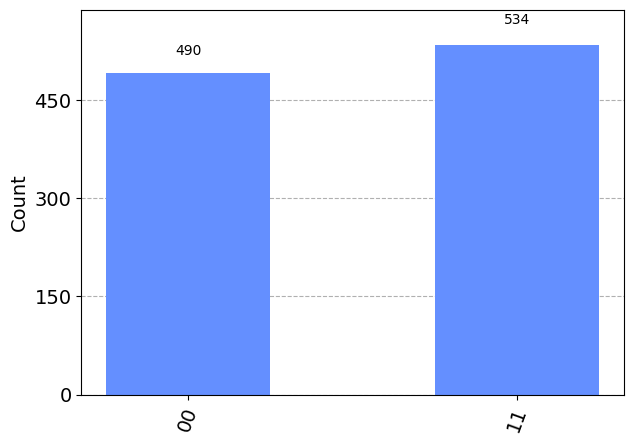

In [55]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc, simulator)
job = simulator.run(new_circuit)

# Plot the results
counts = job.result().get_counts(new_circuit)
print("Measurement Results:")
print(counts)
plot_histogram(counts)

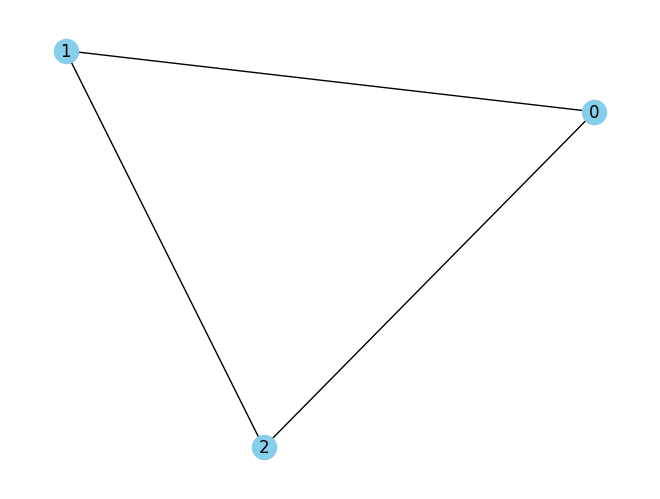

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Example adjacency matrix (replace this with your matrix)
A = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])

# Create the graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue')
plt.show()


In [57]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from math import pi

theta = [Parameter(f'θ{i}') for i in range(1, 3)]  
rotation_value = pi/2  

qc = QuantumCircuit(3)

for i in range(2):
    qc.h(i)

for i, t in enumerate(theta):
    # First, create an RZ gate
    qc.rz(t, 2)
    # Then, make it a controlled gate and add it to the circuit
    qc.cz(i, 2)  # Use CZ as an example for creating a controlled-Z operation

qc.x(1)


for i in range(0,1):
    qc.cx(i, i+1)

for i in range(0,1):
    qc.cx(i, i+1)


for i in range(2):
    qc.ry(rotation_value, i)

qc.measure_all()

print(qc.draw())


          ┌───┐                                  ┌─────────┐ ░ ┌─┐      
   q_0: ──┤ H ├────■─────────────────────■────■──┤ Ry(π/2) ├─░─┤M├──────
          ├───┤    │              ┌───┐┌─┴─┐┌─┴─┐├─────────┤ ░ └╥┘┌─┐   
   q_1: ──┤ H ├────┼────────────■─┤ X ├┤ X ├┤ X ├┤ Ry(π/2) ├─░──╫─┤M├───
        ┌─┴───┴──┐ │ ┌────────┐ │ └───┘└───┘└───┘└─────────┘ ░  ║ └╥┘┌─┐
   q_2: ┤ Rz(θ1) ├─■─┤ Rz(θ2) ├─■────────────────────────────░──╫──╫─┤M├
        └────────┘   └────────┘                              ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                                0  1  2 


Measurement Results:
{'11 11': 501, '00 00': 523}


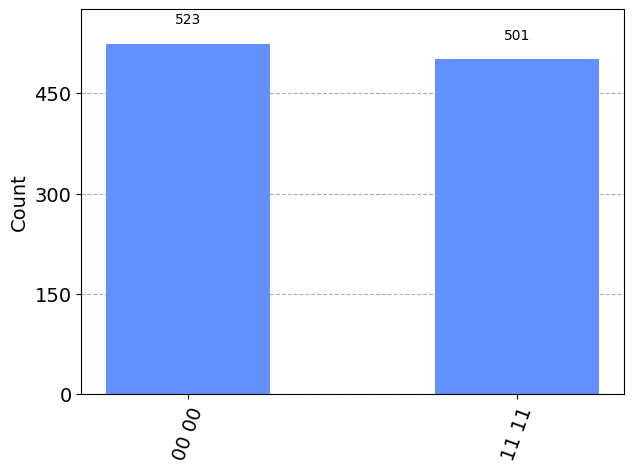

In [56]:
# Simulate the circuit
qc.measure_all()
simulator = Aer.get_backend('qasm_simulator')
new_circuit = transpile(qc, simulator)
job = simulator.run(new_circuit)

# Plot the results
counts = job.result().get_counts(new_circuit)
print("Measurement Results:")
print(counts)
plot_histogram(counts)